# Sentiment Analysis | Data Cleaning and Transformation

The dataset for training, I chose “Sentiment140”, which originated from Stanford University. More info on the dataset can be found from the link. http://help.sentiment140.com/for-students/

The dataset can be downloaded from the below link.
http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

**Note** : While running this notebook, Monitor your RAM usage. if it is too much and your machine is facing issues, Make the dataset small by removing some rows. Make sure you remove from the both sentiment classes equally(Positive, Negative)

The order of the cleaning is 
1. Souping
2. url address('http:'pattern), twitter ID removing
3. url address('www.'pattern) removing
4. lower-case
5. negation handling
6. removing numbers and special characters
7. tokenizing and joining

In [7]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Tweet cleaning methods.

In [8]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

#### Loading dataset and assigning 0 to Negative and 1 to Positive

In [8]:
df = pd.read_csv("data.csv", header=None, usecols=[0,5], names=['sentiment','text'], encoding = "ISO-8859-1")
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### Applying tweet cleaning method to each tweet in the dataset

In [11]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, len(df) )   )                                                                 
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed


E:\Workspace\IDE\winPython 3.5\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed


E:\Workspace\IDE\winPython 3.5\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed
Wall time: 10min 44s


#### Storing clean dataset for later use

In [12]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

#### Loading clean dataset to check if it was saved right

In [9]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


After cleaning the tweets with the updated cleaner function, I took another look at the info(). i found that there are couple of thousand NULL tweets

In [10]:
np.sum(my_df.isnull().any(axis=1))

3959

Which column of the dataset has NULL values?

In [11]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

Loading our main dataset again to see what was in those tweets which became NULL when we applied cleaning method

In [22]:
df = pd.read_csv("data.csv", header=None, encoding = "ISO-8859-1")
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


By looking at these entries in the original data, it seems like only text information they had was either twitter ID or it could have been URL address.
Anyway, these are the info I decided to discard for the sentiment analysis, so I will drop these null rows, and update the data frame.

#### Removing NULL Tweets

In [12]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


# Word Cloud

For the word cloud, I used the python library wordcloud.

In [14]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

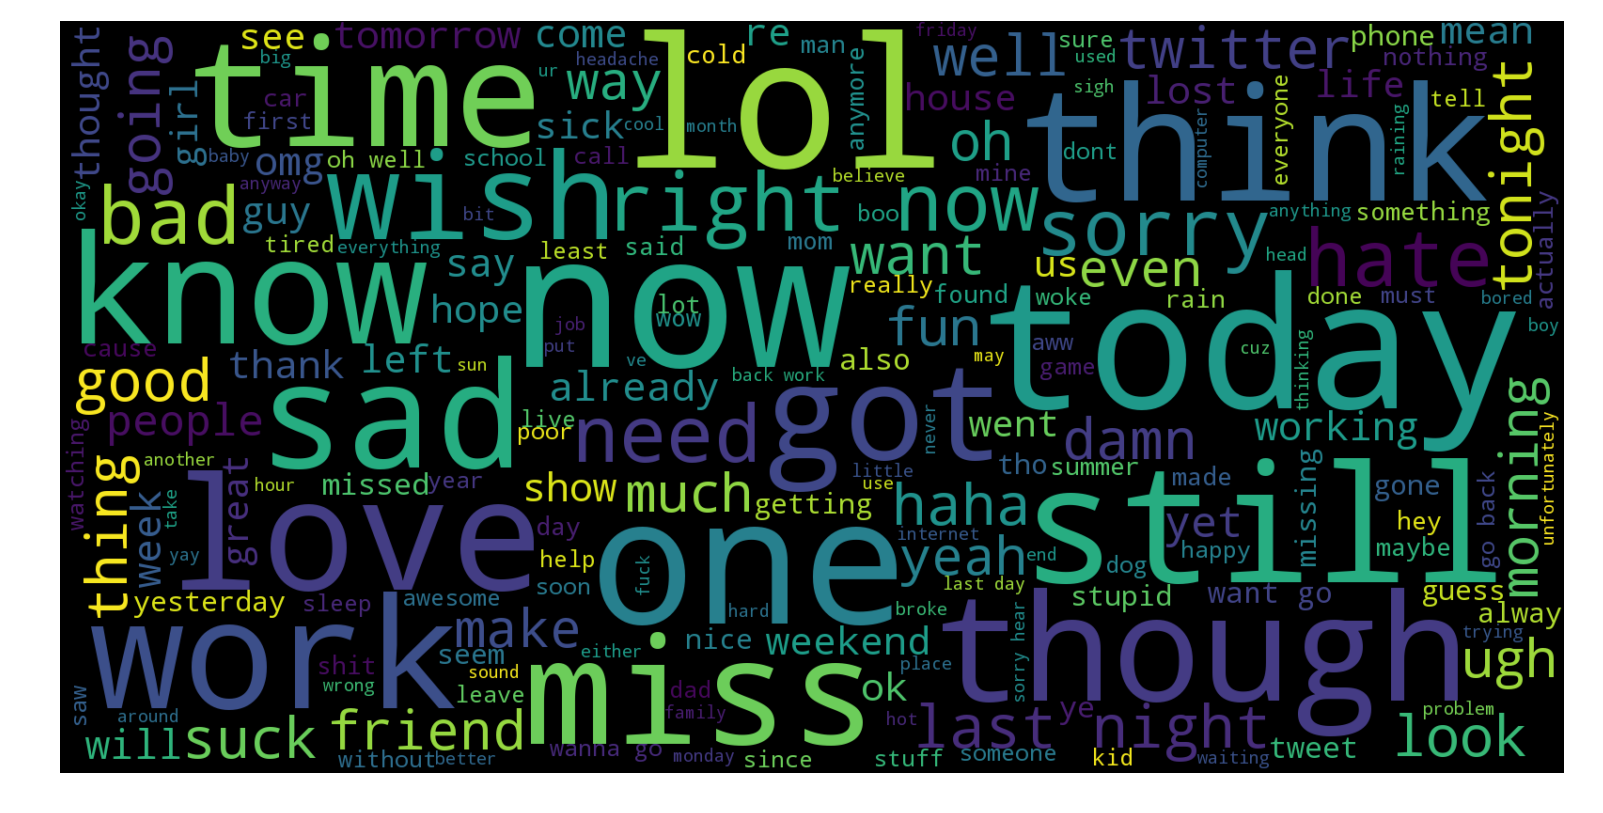

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some of the big words can be interpreted quite neutral, such as "today","now", etc.
I can see some of the words in smaller size make sense to be in negative tweets,
such as "damn","ugh","miss","bad", etc.
But there is "love" in a rather big size, so I wanted to see what is happening.

In [15]:
for t in neg_tweets.text[:150]:
    if 'love' in t:
        print(t + "\n")

ahh ive always wanted to see rent love the soundtrack

meh almost lover is the exception this track gets me depressed every time

awe love you too am here miss you

damn the grind is inspirational and saddening at the same time do not want you to stop cuz like what do much love

missing you babe but as long as your alive happy ya tired my love imma try to sleep hopefully you had headstart



OK, even though the tweets contain the word "love", in these cases it is negative sentiment because the tweet has mixed emotions like "love" but "miss". Or sometimes used in a sarcastic way.

In [40]:
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

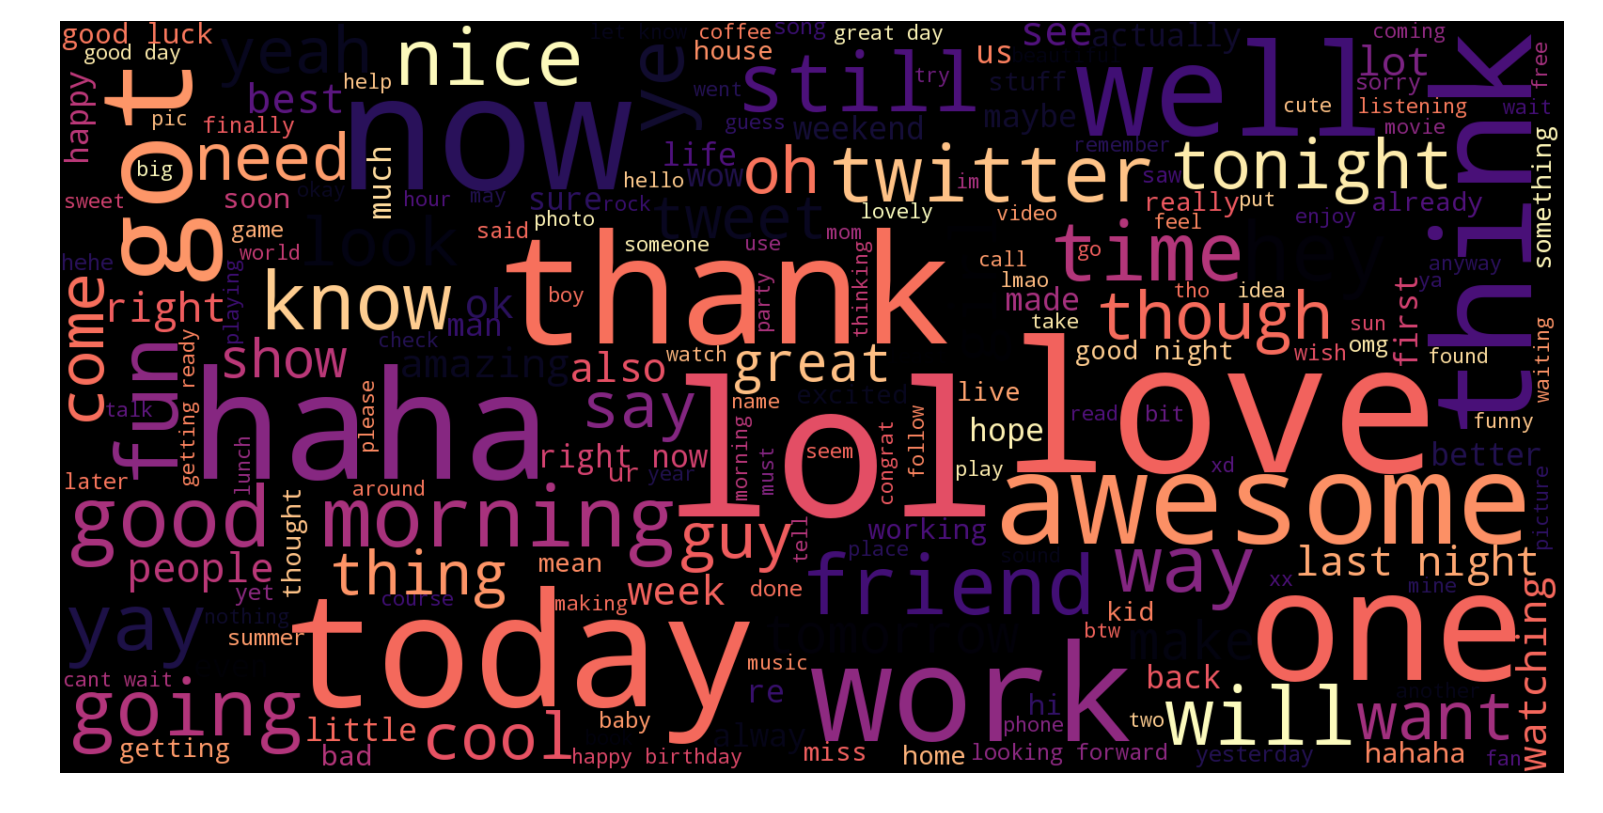

In [41]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Again I see some neutral words in big size, "today","now",
but words like "haha", "love", "awesome" also stand out.

Interestingly, the word "work" was quite big in the negative word cloud, but also quite big in the positive word cloud.
It might imply that many people express negative sentiment towards work, but also many people are positive about works.

In [ ]:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud, df

## Preparion for data visualisation

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
len(cvec.get_feature_names())

264939

OK it looks like count vectorizer has extracted 264936 words out of the corpus.

In [7]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [51]:
term_freq_df[20:30]

,0,1
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0,2
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,1,0
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0,1
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,1,0
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah,0,1
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah,1,0
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh,0,1
aaaaaaaaaaaaaaaaaaaaaaaaaaaaall,1,0
aaaaaaaaaaaaaaaaaaaaaaaaaaaao,1,0
aaaaaaaaaaaaaaaaaaaaaaaaaargh,1,0


In [58]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [8]:
print(term_freq_df[term_freq_df.index == "love"])

          0      1
love  16990  47694


In [60]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')